# Machine Learning

In this Notebook we will see, previously, when there was no deep learning(or when deep learning was not popular), how people used machine learning algorithms to classify objects. We will solve simple classification problem using **KNN**.

**Note:** It is expected that you atleast know some fundamentals of machine learning algorithms.

 The computer cannot see the images as humans do. It only looks at numbers, and that’s what the images are. Each pixel is a feature. Just read the grayscale image using OpenCV or Python-PIL, convert to a numpy array and ravel (flatten) the matrix. If you are dealing with RGB images, then you have three matrices instead of one. But the idea remains the same. 

## MNIST dataset

We'll use one of the most famous datasets in computer vision, [MNIST](https://en.wikipedia.org/wiki/MNIST_database), for our experiments. MNIST contains hand-written digits, collected by the National Institute of Standards and Technology, and collated into a machine learning dataset by Yann Lecun and his colleagues. Lecun used MNIST in 1998 to demonstrate [Lenet 5](https://yann.lecun.com/exdb/lenet/), the first computer system to demonstrate practically useful recognition of hand-written digit sequences. This was one of the most important breakthroughs in the history of AI.

You can download the dataset from [here](https://www.kaggle.com/scolianni/mnistasjpg). Once downloaded, extract it inside *data* directory. 

The original dataset is in *csv* format, but we will work with images, because we are learning computer vision! Also, we want you to learn the complete end-to-end process. 

The dataset contains gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. We will try to build a machine learning model to classify these digits for us.

Lets start by looking at an image . . 

In [1]:
import cv2
import joblib
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

**Note:** *Pathlib* is an amazing built-in library in python. It makes working with paths super easy. High recommend!

(28, 28, 3)


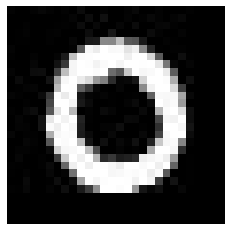

In [2]:
img_path = 'data/trainingSet/0/img_1.jpg'
img = cv2.imread(img_path)
print(img.shape)

plt.axis(False)
plt.imshow(img);

Nice, it looks like a zero. If you look at the image shape (i.e 28 x 28 x 3), its using 3 channels. It is not a gray-scale image even though it looks like one! You can easily represent black and white images in RGB color space by just using 2 colors (black and white). So, never go for what you see. *Always check the shape of the image*.

We will have to convert the image to gray scale first

(28, 28)


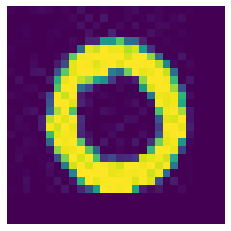

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

plt.axis(False)
plt.imshow(img);

Great, now the shape looks correct but the colors look different, this is because matplotlib using other color scheme. You can easily fix it by using *cmap* argument. We will have to explicitly ask matplotlib to use *gray* color scheme.

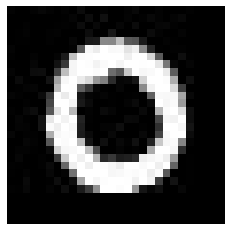

In [4]:
plt.axis(False)
plt.imshow(img, cmap='gray');

We will be reading and displaying a lot images, it would be a good idea to make some functions for the job.

In [5]:
def read_img(path):
    img = cv2.imread(path, cv2.COLOR_BGR2GRAY)
    return img

def plot_img(img):
    plt.axis(False)
    plt.imshow(img, cmap='gray');

We will now write a function to read all the images and use their parent folder name as label. 

In [6]:
def load_data(base_path):
    images = []
    labels = []
    
    for folder in base_path.iterdir():
        label = int(folder.stem)
        for img_path in folder.glob('*.jpg'):
            img = read_img(str(img_path))
            images.append(img)
            labels.append(label)
        
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

we iterate over all the folders and then all the images inside all the folders. We then read the image and append it to the *images* list. We also append the parent folder name (i.e. label) to the labels list. Spend some time reading the function and make sure you understand what its doing.

**Hint:** remove the *for loop* and try running it on a single image.

In [7]:
%%time
base_path = Path('data/trainingSet')
images, labels = load_data(base_path)
images.shape, labels.shape

Wall time: 3min 8s


((42000, 28, 28), (42000,))

The above cell may take some time to run. The time may vary depending upon your computer specs. The number of images and the number of labels are extactly same i.e one label for each 28 x 28 image. That means we did everything right.

**Formatting our data as per Machine Learning algorithms**

All Machine learning algorithms such as k-NN, SVMs and Decision trees require all samples in the dataset to have a ﬁxed size. In the case of images, this requirement implies that our images must be preprocessed and scaled to have identical widths and heights. Here, our images are already preprocessed and scaled. So, we can use them directly. 

Let's move ahead and convert our 2D image into one dimension because machine learning algorithm takes 1 dimensional features, after that split our data into Training and validation set.

In [8]:
images = images.reshape(42000, 28*28)
images.shape

(42000, 784)

We have converted all our images from 28 x 28 to a 1D vector with 784 values. In machine learning terminology,  we have 42,000 samples and each sample has 784 features. If your seeing the `reshape` function for the first time then we will recommend you to google it. Its really powerful and increases your overall understanding of the nd-arrays.

time to split our data . . .

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels)

We used the `train_test_split` function from *sklearn*. Its simply splits our features and labels.

**Note:** You are not suppose to understand everything. Just follow along! Because explaining all these things will take a lot time and is also, out of the scope of this course. If you are interested in learning more, then we have a separate *course on Machine Learning* where we will discuss everything in detail.

Lets train some models and validate them.

### K-nearest neighbors Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

**Note:** KNN is a very slow alogrithm. So the below cell can take 10-15 mins to run. Make sure you are patient.

In [11]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.965

97% accuracy, that is pretty dope. Time to make some predictions

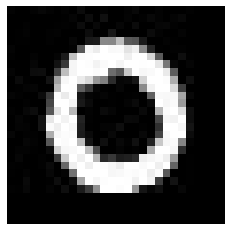

In [13]:
img_path = 'data/trainingSet/0/img_1.jpg'
img = read_img(img_path)
plot_img(img)

lets see what our model things of this image

In [14]:
model.predict([img.reshape(28*28)])

array([0])

Thats right! lets try another image.

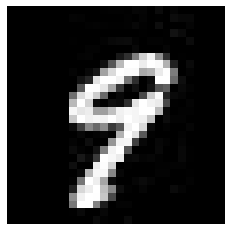

In [15]:
img_path = 'data/trainingSet/9/img_11.jpg'
img = read_img(img_path)
model.predict([img.reshape(28*28)])
plot_img(img)

Great, right? In couple of minutes, the model learned to classify hand-written digits. You can create some new digits in microsoft paint and use them as input. 

One main advantage of the k-NN algorithm is that it’s extremely simple to implement and understand. Furthermore, the classiﬁer takes absolutely no time to train, since all we need to do is store our data points for the purpose of later computing distances to them and obtaining our ﬁnal classiﬁcation. 

However, we pay for this simplicity at classiﬁcation time. Classifying a new testing point requires a comparison to every single data point in our training data, which scales O(N), making working with larger datasets computationally prohibitive. 

Finally, the k-NN algorithm is more suited for low-dimensional feature spaces (which images are not). If we use a lot of images, KNN can take much longer to predict as it calculates distance to every other images.

Let's try some other algorithm

### SVM Classifier

In [16]:
from sklearn import svm
svm = svm.SVC(random_state = 0)
svm.fit(X_train,y_train)
svm.score(X_test, y_test)

0.9745238095238096

So, SVM outperformed KNN classifier. We can use this approach for images, and this is how it was used in good old times. SVM was quite famous for image datasets. 

We can save these trained model in a pickle file and use them to make predictions later. Since SVM gave use better score, we wil save it. 

In [17]:
joblib.dump(svm, 'data/digit_svm.pkl')

['data/digit_svm.pkl']

Machine learning algorithms can take hours to train when working with bigger images (like 512 x 512), also sometimes high dimensionality can give you lower scores. In such situations, its recommended to use techniques like `PCA` and `SVD` for dimensionality reduction. 

**Note:** Discussing all these algorithm and techniques is out of the scope of the course. We highly recommend you to check out our *machine learning course*, if you want to master Machine Learning algorithms and techniques.

### Making predictions

We will first need an image with hand-written digits. You can either write a digit on a paper, and click a photo or draw a digit in microsoft paint. I have already created an image in paint. Lets load it

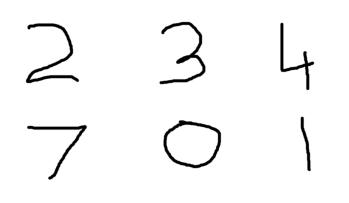

In [18]:
digits = read_img('images/digits.png')
plot_img(digits)

after doing some trial-error, I was able to select the digit 2 in upper-left corner

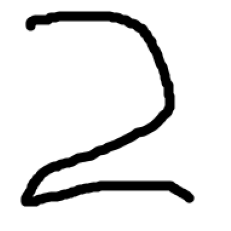

In [19]:
two = digits[40:220, 40:220]
plot_img(two)

Nice, so we have selected out 2. For our machine learning model to work, it should get input in the same format in which it was trained on. In the training images, the digits were in white and the background was black. But our image look different, the easiest way to fix it would be to use inverse thresholding.

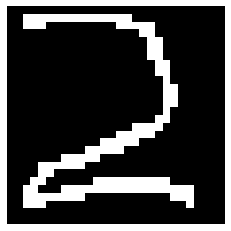

In [20]:
two = cv2.resize(two, (28,28))
two = cv2.cvtColor(two, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(two, (3, 3), 0)
final = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 3, 4)
plot_img(final)

pretty close. Lets load our model and try to predict what number it is . . . 

In [21]:
model = joblib.load('data/digit_svm.pkl')
model

SVC(random_state=0)

In [22]:
model.predict([final.reshape(-1)])

array([2])

Amazing, our model got it write. Lets put it all inside a function

In [23]:
def process_img(img, gray=False):
    img = cv2.resize(img, (28,28))
    if not gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(img, (3, 3), 0)
    final = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 3, 4)
    return final.reshape(-1)

In [24]:
two = digits[40:220, 40:220]
out = process_img(two)
model.predict([out])

array([2])

**Exercise:**
- select other digits and use the SVM model to classify them. Just like we did in the above cell.

So far, we can take an image of any digit and predict which digit it is. But we won't get the digit image always. We will have to find a way to extract it from an image. For extracting digits we can use `cv2.findContours` method. Lets see how

In [25]:
blurred = cv2.GaussianBlur(digits, (7, 7), 0)
edged = cv2.Canny(blurred, 30, 150)
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(cnts)

6

we found 6 contours, exactly the number of digits we have. I have spent some time playing with the arguments like kernel size in `cv2.GaussianBlur`. I would highly recommend you to do it yourself. Lets draw these contours

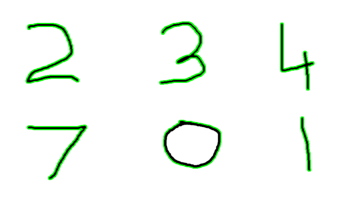

In [26]:
temp = digits.copy()
plot_img(cv2.drawContours(temp, cnts, -1, (0, 255, 0), 2))

this look great but is it really useful? Our model wants digit images, finding outlines won't help. So lets draw rectangle around these digits

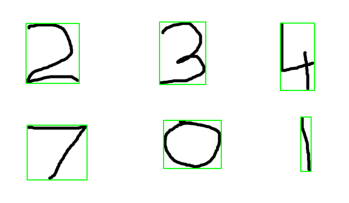

In [27]:
temp = digits.copy()
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    temp = cv2.rectangle(temp, (x,y), (x+w,y+h), (0,255,0), 2)

plot_img(temp)

Amazing, we are able to extract digits from our images and we already know how to make prediction if we have the digit. Lets put it all together.

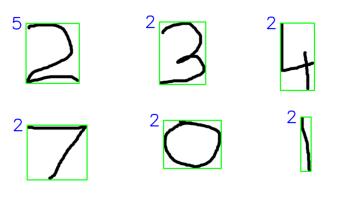

In [28]:
temp = digits.copy()

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    roi = temp[y:y + h, x:x + w]
    roi = process_img(roi)
    pred = model.predict([roi])[0]
    temp = cv2.rectangle(temp, (x,y), (x+w,y+h), (0,255,0), 2)
    cv2.putText(temp, str(pred), (x - 40, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 2)

plot_img(temp)

Our model made a lot of wrong prediction, almost ever digits is incorrectly predicted. But why is it so? We got 97% accuracy in our testset, but here we are hardly getting anything right. There are two main reasons for this poor performance:
1. Input images is different than training images
2. Current features (flatten image) are very poor at capturing information.

We will be discussing each of these reasons, in details, in the next notebook.

## Questionaire

- What is the expected input format for a machine learning algorithm?
- Why do we split our data into train and test set?
- What does reshape method do?
- What is pickle object? How do you load it?